In [1]:
using Pkg; Pkg.add(PackageSpec(url="https://github.com/pvpisistratus/RandomBattles.jl", rev="master"))

   Updating git-repo `https://github.com/pvpisistratus/RandomBattles.jl`


Username for 'https://github.com': pvpisistratus
Password for 'https://pvpisistratus@github.com': ········
Fetching: [========================================>]  100.0 %

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [============================Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [02d78f1d] ~ RandomBattles v0.1.0 #master (https://github.com/pvpisistratus/RandomBattles.jl)
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [02d78f1d] ~ RandomBattles v0.1.0 #master (https://github.com/pvpisistratus/RandomBattles.jl)


In [2]:
using RandomBattles, Plots, Distributions

┌ Info: Precompiling RandomBattles [02d78f1d-6942-4113-b550-739f20f5c505]
└ @ Base loading.jl:1260


In [3]:
state = State(["azumarill" "altaria" "registeel" "deoxys_defense" "skarmory" "umbreon"]);

In [4]:
@time strat = Strategy(state);

 (1, 13) (1, 2) (1, 1) (1, 4) (1, 1) (1, 1) (1, 4) (1, 2) (1, 2) (1, 3) (1, 2) (1, 1) (1, 1) (1, 4) (1, 6) (1, 2) (1, 2) (1, 4) (1, 1) (1, 1) (1, 4) (1, 1) (1, 1) (1, 18) (1, 1) (1, 1) (1, 2) (1, 3) (1, 15) (1, 1) (1, 1) (1, 3) (1, 1)1103.801197 seconds (4.84 G allocations: 1.343 TiB, 11.96% gc time)


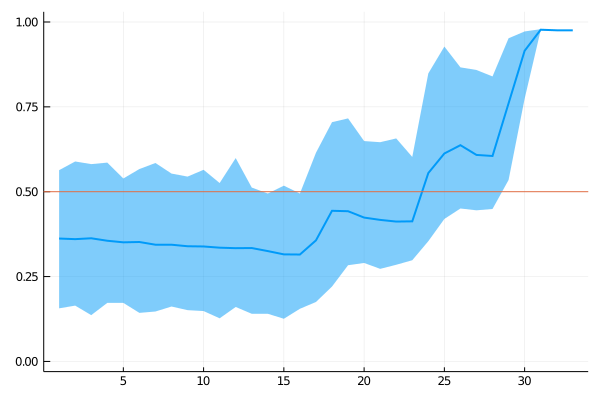

In [5]:
scores = mean.(get_battle_scores.(strat.history, Ref(1000)))
mins = first.(strat.minimaxes)
maxes = last.(strat.minimaxes)
plot(1:length(scores), scores, ribbon = (scores .- mins, maxes .- scores), 
    ylims = [0,1], width = 2, legend = false)
hline!([0.5])

In [6]:
state2 = State(["deoxys_defense" "skarmory" "umbreon" "azumarill" "altaria" "registeel"]);

In [7]:
@time strat2 = Strategy(state2);

 (1, 12) (1, 4) (1, 3) (1, 3) (1, 3) (1, 1) (1, 3) (1, 4) (1, 4) (1, 3) (1, 3) (1, 4) (1, 1) (1, 3) (1, 4) (1, 3) (1, 4) (1, 3) (1, 6) (1, 3) (1, 3) (1, 1) (1, 1) (1, 20) (1, 2) (1, 2) (1, 2) (1, 3) (1, 4) (1, 4) (1, 2) (1, 15) (1, 1) (1, 1) (1, 1) (1, 3) (1, 1)1467.627370 seconds (6.28 G allocations: 1.729 TiB, 13.34% gc time)


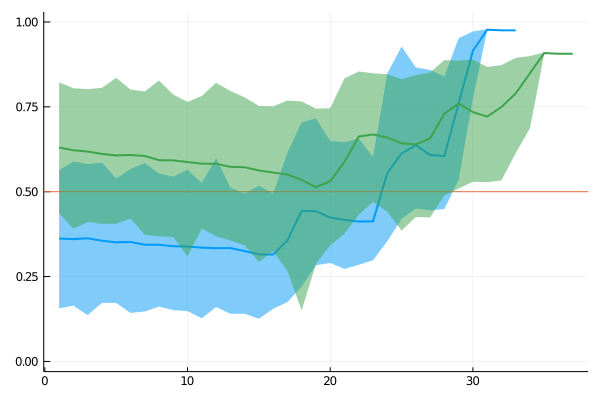

In [8]:
scores = mean.(get_battle_scores.(strat2.history, Ref(1000)))
mins = first.(strat2.minimaxes)
maxes = last.(strat2.minimaxes)
plot!(1:length(scores), scores, ribbon = (scores .- mins, maxes .- scores), ylims = [0,1], width = 2, legend = false)

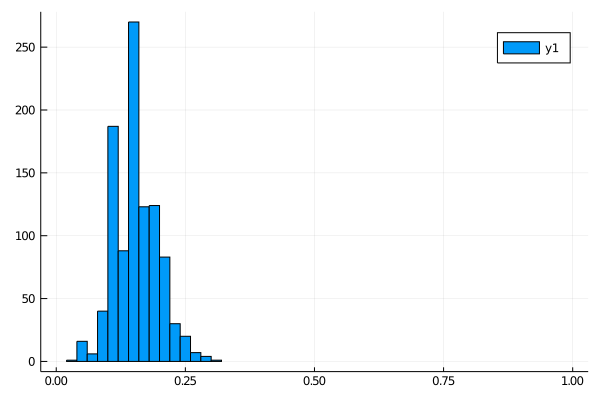

In [9]:
histogram(get_battle_scores(State(["probopass" "probopass" "probopass" "medicham" "medicham" "medicham"]), 1000), xlims = [0, 1])